In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# loading the data
data = pd.read_csv('house-prices.csv')
print('Dataset has {} entries and {} features.'.format(data.shape[0], data.shape[1]))

Dataset has 2430 entries and 82 features.


In [3]:
# classify variables

# this will be helpful when encoding by variable types

# 1 - Numeric variables
numeric = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',
          '1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF',
           'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val',
          ]
# 2 - Categorical variables
# 2.1 - Categorical variables, ordinal (possibility of ordering)
categorical_ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
                      'Exter Cond','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                      'Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual',
                       'Garage Cond','Paved Drive','Pool QC','Fence'
                      ]
# 2.2 - Categorical variables, nominal (no possibility to order) 
categorical_nominal = ['MS SubClass','MS Zoning','Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood',
                      'Condition 1', 'Condition 2', 'Bldg Type','House Style','Roof Style', 'Roof Matl','Exterior 1st',
                      'Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature',
                       'Sale Type','Sale Condition'
                      ]
# 2.3 - Categorical variables, discrete
categorical_discrete = ['Year Built', 'Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath',
                       'Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold',
                        'Yr Sold'
                       ]
categorical = categorical_ordinal + categorical_nominal + categorical_discrete

In [4]:
# Function for handling the missing values
def preprocess_df(df):
    columns_to_drop = ['PID', 'Order']
    columns_to_zero = ['Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Bsmt Half Bath', 'Bsmt Full Bath', 
                      'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']
    columns_to_NA = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type','Garage Yr Blt',
                 'Garage Finish','Garage Qual','Garage Cond', 'Bsmt Qual' , 'Bsmt Cond' , 'Bsmt Exposure' ,
                 'BsmtFin Type 1' , 'BsmtFin Type 2']
    columns_to_none = ['Mas Vnr Type']
    columns_to_mean = ['Mas Vnr Area', 'Lot Frontage']
    columns_to_mode = ['Electrical']
    df_clean = df.copy()
    df_clean = df_clean.drop(columns_to_drop, axis=1)
    df_clean[columns_to_zero] = df[columns_to_zero].fillna(0)
    df_clean[columns_to_NA] = df[columns_to_NA].fillna('NA')
    df_clean[columns_to_none] = df[columns_to_none].fillna('None')
    df_clean[columns_to_mean] = df[columns_to_mean].fillna(df[columns_to_mean].mean())
    df_clean[columns_to_mode] = df[columns_to_mode].fillna(df[columns_to_mode].mode().iloc[0,0])  
    return df_clean

In [5]:
df_clean = preprocess_df(data)

In [6]:
# Final check for missing values
df_clean.isnull().sum().sum()

0

### 1.3 Outliers

### TO DO : 
1. define a function to exclude outliers on the validation set

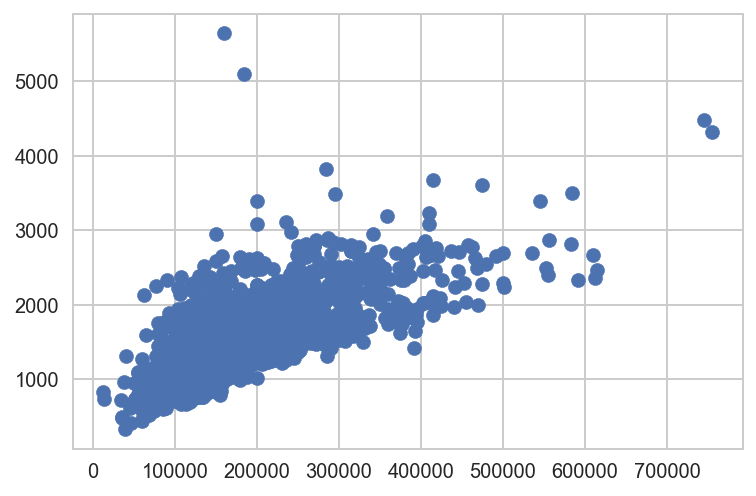

In [7]:
# Find outliers:
# plot of SALE PRICE versus GR LIV AREA 
plt.Figure(figsize=(8,8))
plt.scatter(df_clean['SalePrice'], df_clean['Gr Liv Area'] );

In [8]:
#Remove very large houses (more than 4000 square feet)
df_clean = df_clean[df_clean['Gr Liv Area'] < 4000]

count      -4.000000
mean       -5.591336
std       -19.584241
min         0.000000
25%         0.000000
50%         0.000000
75%        -0.250000
max     -1822.000000
Name: Gr Liv Area, dtype: float64


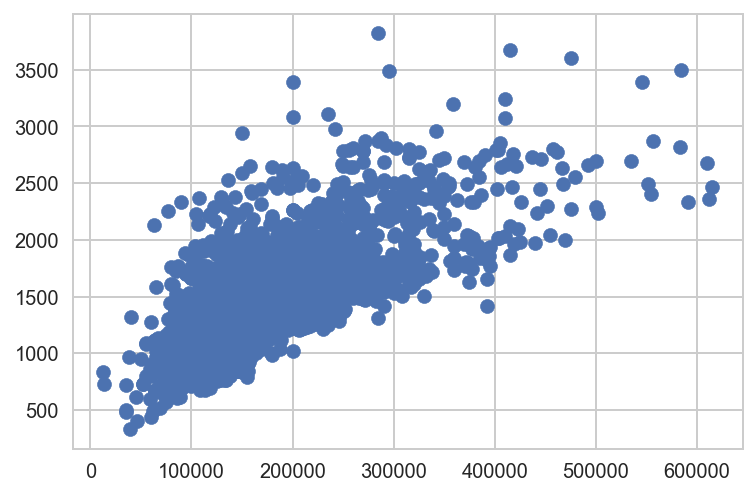

In [9]:
#impact of removing theses 4 outliers
a = df_clean['Gr Liv Area'].describe() - data['Gr Liv Area'].describe()
print(a)
plt.Figure(figsize=(8,8))
plt.scatter(df_clean['SalePrice'], df_clean['Gr Liv Area']  );
plt.show()

## 2. Encoding

#### I defined 2 ways to encode the data frame:####
0. First, encoding the ordinal variables by assigning a value from 0 (none) / 1 (poor) to 5 or 6 (excellent) to these variables with the .replace method, then either:
    1. One-hot encoding nominal variables with pandas.get_dummies() (df_ohe)
    2. Label Encoding categorical nominal variables with sklearn LabelEncoder (df_le)
1. *what to do with discrete variables. ?*

In [ ]:
## FUNCTION TO FINISH ##
# return 2 df, one with ohe, the other with labeling 
def encode(df):
    # Encoding Ordinal variables:
    # assigning a value from 0 (none) / 1 (poor) to 5 or 6 (excellent) to these variables
    quality_features = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual',
                    'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC','Fence']
    df[quality_features] = df[quality_features].replace({
        'Ex' : 5, 'Gd' : 4,'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0
    })
    
    # Encoding other ordinal variables, with specific 'scales', creating a dict for each variable
    other_ord_features = {
        'Lot Shape' : {'Reg': 4, 'IR1': 3, 'IR2' : 2, 'IR3' : 1},
        'Utilities' : {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
        'Land Slope' : {'Gtl' : 3, 'Mod' : 2, 'Sev' : 1},
        'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3,'Mn' : 2, 'No' : 1, 'NA' : 0},
        'BsmtFin Type 1' : {'GLQ' : 6, 'ALQ' : 5,'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
        'BsmtFin Type 2' : {'GLQ' : 6, 'ALQ' : 5,'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
        'Electrical' : {'SBrkr' : 5, 'FuseA' : 4,'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
        'Functional' : {'Typ' : 8, 'Min1' : 7,'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal':1},
        'Garage Finish' : {'Fin' : 3, 'RFn' : 2,'Unf' : 1, 'NA' : 0},
        'Paved Drive' : {'Y' : 3, 'P' : 2,'N' : 1}
    }
    df.replace(other_ord_features, inplace=True)   
    
    # One-hot encoding for nominal variables 
    df_ohe = pd.get_dummies(df, columns=categorical_nominal)
    
    # Label Encoding with sklearn:
    # import preprocessing from sklearn
    from sklearn import preprocessing
    # Create a LabelEncoder object and fit it to each feature in test DF
    le = preprocessing.LabelEncoder()
    # use df.apply() to apply le.fit_transform to categorical_nominal features
    df_le = df.copy()
    df_le[categorical_ordinal] = df_le[categorical_ordinal].apply(le.fit_transform)
    
    print('Origina Size:', df.shape, 'Size when OH encoded:', df_ohe.shape, 'Size when label encoded:', df_le.shape)
    return df_ohe, df_le

In [ ]:
df_ohe, df_le = encode(df_clean)

In [10]:
## Here is my problem:#
#2. Label Encoding categorical nominal variables with sklearn LabelEncoder 
#Labeling with scikit learn (instead of OHE) the categorical_nominal features in order to reduce dimensionality
#for cat ORDINAL, the order is not the same, so I stick to the .replace method

# import preprocessing from sklearn
from sklearn import preprocessing
# Create a LabelEncoder object and fit it to each feature in test DF
le = preprocessing.LabelEncoder()
# use df.apply() to apply le.fit_transform to categorical_nominal features

df_le = df_clean.copy()
#df_le[categorical_ordinal].apply(le.fit_transform) #not working ?

#df_le = df_clean[categorical_nominal].apply(le.fit_transform) # works but has only the transformed columns

print('Origina Size:', df_clean.shape)
print('Size when Label encoded:', df_le.shape)

Origina Size: (2426, 80)
Size when Label encoded: (2426, 80)


In [19]:
#I don't understand why the following works, ie. returne the labeled columns
df_le[categorical_ordinal].apply(le.fit_transform).head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,0,0,0,6,4,2,4,2,5,4,2,6,0,4,2,7,5,0,5,5,2,3,4
1,3,0,0,5,5,3,4,5,5,4,6,6,4,4,2,7,2,3,5,5,2,3,4
2,3,0,0,3,4,3,4,5,5,4,6,6,1,4,4,7,3,3,5,5,2,3,4
3,0,0,0,4,4,3,4,5,5,4,5,6,2,4,2,7,2,2,5,5,2,3,4
4,0,0,0,6,3,1,4,5,5,4,6,6,4,1,4,7,2,3,5,5,0,3,2


In [20]:
# but this doesn't return the labeled columns ?
df_le[categorical_ordinal] = df_le[categorical_ordinal].apply(le.fit_transform)
df_le[categorical_nominal].head()

,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type,Sale Condition
0,60,RL,Pave,NA,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NA,WD,Normal
1,20,RL,Pave,NA,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,Attchd,NA,WD,Normal
2,160,RM,Pave,NA,Lvl,Inside,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,CBlock,GasA,Y,Attchd,NA,WD,Normal
3,20,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,Y,Attchd,NA,WD,Normal
4,190,RM,Pave,NA,Bnk,Inside,OldTown,Feedr,Norm,2fmCon,2.5Unf,Hip,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,N,Detchd,NA,WD,Normal


In [ ]:
#and this doesn't work neither : 
df_le.apply(le.fit_transform(df_clean[categorical_nominal]))

In [ ]:
# It works with a pipeline, although it's not my code & I did not yet looked further into sklearn pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
# I want to encode only the categorical_nominal features, while leaving the other features untransformed.
df_le = MultiColumnLabelEncoder(columns = categorical_nominal).fit_transform(df_clean)
df_le.shape